# TAXI COMPANY ANALYSIS

In this data analysis using dataframes for the dates: November 15-16, 2017, we are going to study the different taxi companies used in Chicago. The top Taxi companies in the Chicago area, the neighborhoods in Chicagoo where these taxi companies are being used and how the the weather conditions affect these trips.

### Importing the necessary Python Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
from datetime import datetime as dt

In [2]:
taxi_name_df = pd.read_csv("/datasets/project_sql_result_01.csv")

In [3]:
location_trips_df = pd.read_csv("/datasets/project_sql_result_04.csv")

In [4]:
location_trips_df

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [5]:
loop_to_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')

### Checking the Format of Column Names of DataFrames

In [6]:
taxi_name_df.columns

Index(['company_name', 'trips_amount'], dtype='object')

In [7]:
location_trips_df.columns

Index(['dropoff_location_name', 'average_trips'], dtype='object')

In [8]:
loop_to_ohare.columns

Index(['start_ts', 'weather_conditions', 'duration_seconds'], dtype='object')

We can observe that the column names are in good format, no need to rename the column names.

### Check Correct Data Types and Missing Values

In [9]:
taxi_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [10]:
taxi_name_df.groupby('trips_amount').sum()

,company_name
trips_amount,
2,3556 - 36214 RC Andrews Cab
3,2241 - 44667 - Felman Corp
5,5874 - 73628 Sergey Cab Corp.
7,4053 - 40193 Adwar H. Nikola2733 - 74600 Benny...
8,5062 - 34841 Sam Mestas
11,Metro Group
12,5997 - 65283 AW Services Inc.
13,6057 - 24657 Richard Addo
14,3721 - Santamaria Express5006 - 39261 Salifu B...


In [11]:
location_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [12]:
location_trips_df.groupby('dropoff_location_name').sum()

,average_trips
dropoff_location_name,
Albany Park,180.900000
Andersonville,16.866667
Archer Heights,8.366667
Armour Square,77.033333
Ashburn,16.133333
...,...
West Ridge,298.333333
West Town,516.400000
Wicker Park,182.600000


In [13]:
loop_to_ohare['start_ts'] = pd.to_datetime(loop_to_ohare['start_ts'])
loop_to_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [14]:
loop_to_ohare['start_ts'].dt.date

0       2017-11-25
1       2017-11-25
2       2017-11-25
3       2017-11-04
4       2017-11-11
           ...    
1063    2017-11-25
1064    2017-11-11
1065    2017-11-11
1066    2017-11-11
1067    2017-11-04
Name: start_ts, Length: 1068, dtype: object

In [15]:
loop_to_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [16]:
taxi_name_df[taxi_name_df.isna()].sum()

company_name      0
trips_amount    0.0
dtype: object

In [17]:
location_trips_df[location_trips_df.isna()].sum()

dropoff_location_name      0
average_trips            0.0
dtype: object

In [18]:
loop_to_ohare[loop_to_ohare.isna()].sum()

weather_conditions      0
duration_seconds      0.0
dtype: object

In the cells above, in the loop_to_ohare dataframe, the data type that was incorrect was the start_ts column, but with the pandas to_datetime() function it was corrected. The other columns in the rest of the dataframes have to correct data types. Also, we checked if any of the columns had any missing values and by applying the sum() function to the dataframes, you can see that they're no missing values in neither of the DataFrames.

In [19]:

loop_to_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


### Checking the Dataframes for Duplicates

In [20]:
taxi_duplicates = taxi_name_df.duplicated().sum()

locations_duplicates = location_trips_df.duplicated().sum()

loop_duplicated = loop_to_ohare.duplicated().sum()

print(f"There are {taxi_duplicates} duplicated values in the taxi_name dataFrame.")
print()
print(f"There are {locations_duplicates} duplicated values in the location_trips_df dataframe.")
print()
print(f"There are {loop_duplicated} duplicated values in the Loop_to_ohare dataframe.")

There are 0 duplicated values in the taxi_name dataFrame.

There are 0 duplicated values in the location_trips_df dataframe.

There are 197 duplicated values in the Loop_to_ohare dataframe.


### Dropping Duplicates

Since the Loop to Ohare data frame, we found 197 duplicates, we are going to drop them to have more accurate data going forward.

In [21]:
loop_to_ohare = loop_to_ohare.drop_duplicates()

In [22]:
loop_to_ohare.duplicated().sum()

0

### Top 10 Neighborhoods in terms of Drop-offs

In [23]:
top_dropoffs = location_trips_df.sort_values(by='average_trips', ascending= False).head(10)

In [24]:
top_dropoffs

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Here we can observe the top 10 neighborhoods in termns of drop offs. We sorted by the average trips column and we sorted them by descending to give us the top ten neighborhoods by using head(10) function.

### Taxi companies and top 10 neighborhood graph comparisons

In [25]:
df_indexed = top_dropoffs.set_index('dropoff_location_name', drop=True).sort_values(by="average_trips")

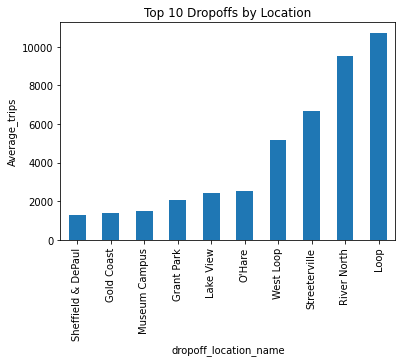

In [26]:
df_indexed.plot(kind="bar",
               title="Top 10 Dropoffs by Location",
               legend=False,
               ylabel='Average_trips')
plt.show()

In [27]:
taxi_graph = taxi_name_df.set_index('company_name', drop=True).head(10).sort_values(by='trips_amount')

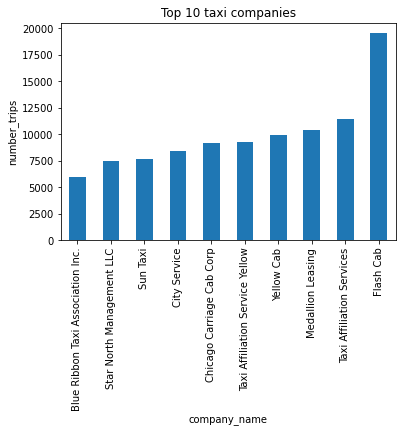

In [28]:
taxi_graph.plot(kind='bar',
               legend=False,
               title="Top 10 taxi companies",
               ylabel = 'number_trips')
plt.show()

According to the data, we can come to a conclusion that the top dropoff location according to the dropoff dataframe is that the most popular dropoff location is the Loop neighborhood and the least popular dropoff location is the Sheffield & Depaul neighborhood. Also, the top taxi company is Flash Cab and the least used taxi company is the Blue Ribbon taxi Association.

### Testing the Hypothesis

In the code below, we filtered the data so only the dats shown on the dataframe are for Saturday:

In [29]:
loop_to_ohare['is_saturday'] = loop_to_ohare['start_ts'].dt.weekday == 5
loop_to_ohare

,start_ts,weather_conditions,duration_seconds,is_saturday
0,2017-11-25 16:00:00,Good,2410.0,True
1,2017-11-25 14:00:00,Good,1920.0,True
2,2017-11-25 12:00:00,Good,1543.0,True
3,2017-11-04 10:00:00,Good,2512.0,True
4,2017-11-11 07:00:00,Good,1440.0,True
...,...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0,True
1061,2017-11-18 16:00:00,Bad,2186.0,True
1063,2017-11-25 11:00:00,Good,0.0,True
1064,2017-11-11 10:00:00,Good,1318.0,True


H0 The average duration of the Bad Weather conditions and the Good weather conditions are not different on Saturday.

H1 The average duration of the Bad Weather conditions and the Good weather conditions are different on Saturday.

In [30]:

good_conditions = loop_to_ohare[loop_to_ohare["weather_conditions"] == "Good"]["duration_seconds"]

bad_conditions = loop_to_ohare[loop_to_ohare["weather_conditions"] == "Bad"]["duration_seconds"]

alpha = 0.05

results = st.ttest_ind(good_conditions, bad_conditions, equal_var = False)
print(f"The Pvalue is: {results.pvalue}")

if results.pvalue >= alpha:
    print("Cannot reject the H0")
else:
    print("Reject the HO")

The Pvalue is: 9.126383933880083e-08
Reject the HO


The null hypothesis or H0: Represents the "no effect" or "default" scenario. In this case, we are seeing if the Good weather conditions and bad weather conditions has no effect on the duration of the trips on Saturday.

The alternative Hypothesis or the H1: Represents the opposite of the null hypothesis. In this study, we are seeing if the good weather or bad weather affects the duration of each trip on Saturday.

### Conclusion

In conclusion to our data analysis, we determined what are the top dropoff neighborhood and also what are the top taxi companies used for these trips. Also, in our hypothesis, by looking at the dataframe for the Loop Neighborhood to the O'hare International Airport, we had to reject the null hypothesis because the null hypothesis states: The average duration of the Bad Weather conditions and the Good weather conditions are not different. Coming to a conclusion that the weather conditions indeed affect the duration of each trip. Although there are more trips during "Good" weather conditions, they are shorter in lengh. Making the bad weather condition trips longer.